<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('/datasets/insurance.csv')
display(data.head())
data.info()
print(data['Пол'].isna().sum())
print(data['Возраст'].isna().sum())
print(data['Зарплата'].isna().sum())
print(data['Члены семьи'].isna().sum())
print(data['Страховые выплаты'].isna().sum())
print(data.isna().sum())

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
0
0
0
0
0
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64


In [3]:
X = data.drop(['Страховые выплаты'], axis = 1)
y = data['Страховые выплаты']
display(X.head())
display(y.head())

RANDOM = 12345
features_train_X, features_test_X, target_train_y, target_test_y = train_test_split(X, y, 
                                                                        test_size=0.25, random_state = RANDOM)


,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0


0    0
1    1
2    0
3    0
4    0
Name: Страховые выплаты, dtype: int64

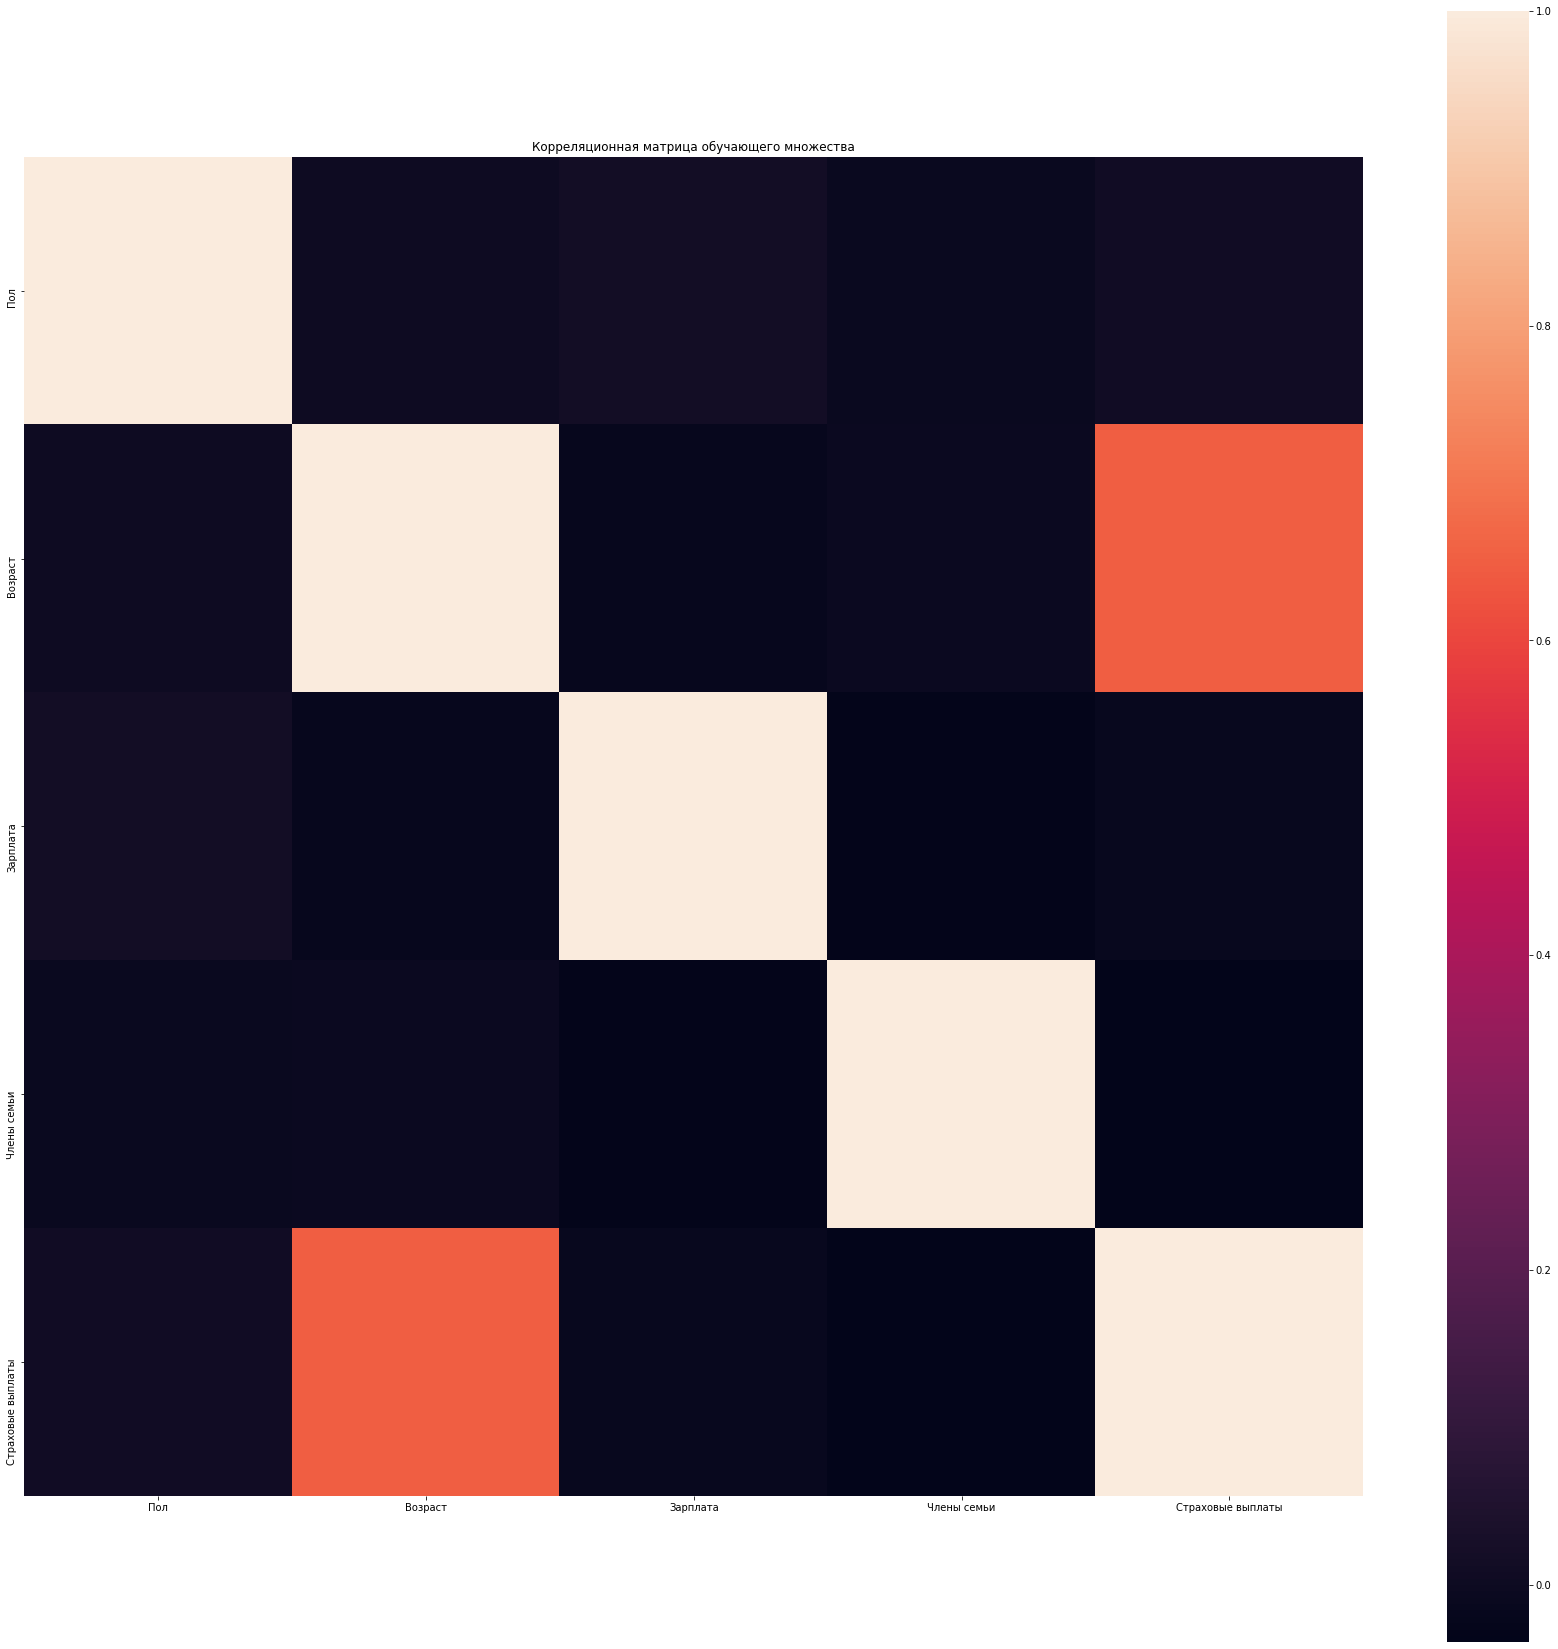

In [4]:
corr_matrix = (pd.concat([X, y], axis = 1)).corr()
plt.figure(figsize = (30, 30))
sns.heatmap(corr_matrix, robust = True, square = True)
plt.title('Корреляционная матрица обучающего множества')
plt.show()

In [5]:
# преобразовать X и y в матрицу и вектор соответственно
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)# < напишите код здесь >
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0
    
model = LinearRegression()
model.fit(features_train_X, target_train_y)
predictions = model.predict(features_test_X)
print(r2_score(target_test_y, predictions))

0.43522757127026657


## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** ...

**Обоснование:** ...

## Алгоритм преобразования

**Алгоритм**

Берём рандомную матрицу P 5x5. Предсказания должны получиться такими же. 

**Обоснование**

$$
\tilde{X} = XP
$$
Докажем, что: $$Xw = \tilde{X}\tilde{w}$$

<b>Доказательство:</b> $$X ((X^T) X)^{-1} X^T y = \tilde{X} (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T y$$ 
$$ X ((X^T) X)^{-1} X^T = X P ((X P)^T (X P))^{-1} (X P)^T $$
$$ X ((X^T) X)^{-1} X^T = X P ((P^T X^T X P)^{-1} P^T X^T $$
$$ X ((X^T) X)^{-1} = X P ((P^T X^T X P)^{-1} P^T $$
Обозначим $$X^T X = B $$
Доказываем далее:
$$ X B^{-1} = X P ((P^T B P)^{-1} P^T $$
$$ X B^{-1} = X P P^{-1}(P^T B)^{-1} P^T $$
$$ X B^{-1} = X E B^{-1} (P^T)^{-1} P^T $$
$$ X B^{-1} = X B^{-1} (P P^{-1})^T $$
$$ X B^{-1} = X B^{-1} $$
<p style="text-align: center;"><b>ЧТД.</b></p>

## Проверка алгоритма

In [6]:
num_rows = 4
num_columns = 4
P = np.random.random((num_rows, num_columns))
print(P)
print(np.linalg.inv(P))
X_1 = np.dot(X, P)
#features_train_X_1, features_test_X_1, target_train_y_1, target_test_y_1 = train_test_split(X_1, y, 
#                                                                        test_size=0.25, random_state = RANDOM)
features_train_X_1 =  np.dot(features_train_X, P)
features_test_X_1 = np.dot(features_test_X, P)
target_train_y_1 = target_train_y
target_test_y_1 = target_test_y

[[0.77836099 0.50094642 0.12274955 0.06978679]
 [0.1463384  0.66661013 0.05943371 0.5033794 ]
 [0.30133068 0.06300275 0.23734427 0.73228312]
 [0.19581379 0.82583413 0.48243627 0.81336357]]
[[ 1.20130729 -0.1824215   0.71755378 -0.63619848]
 [ 0.15497626  0.99522759 -1.14410975  0.40082923]
 [ 0.22713133 -3.55364944 -0.6685469   2.78171886]
 [-0.581282    1.14123273  1.38544347 -0.67429146]]


In [7]:
model_1 = LinearRegression()
model_1.fit(features_train_X_1, target_train_y_1)
predictions_1 = model.predict(features_test_X_1)
print(r2_score(target_test_y_1, predictions_1))

-20890.55146347122


In [8]:
model_1 = LinearRegression()
model_1.fit(features_train_X_1, target_train_y_1)
predictions_1 = model_1.predict(features_test_X_1)
print(r2_score(target_test_y_1, predictions_1))

0.4352275731881611


Выходит, что мы практически подтвердили правильность того, что доказали выше математически:)

А блок под номером 7 неверный, потому что там применялась model, а не model_1.